In [1]:
import numpy as np

import torch
from torchvision import datasets
print(torch.__version__)

import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# plt.style.use('seaborn-colorblind')

1.4.0


In [2]:
trainset = datasets.MNIST('./dataset/mnist', train=True, download=True)
validset = datasets.MNIST('./dataset/mnist', train=False, download=True)

In [3]:
label2color = {i:c for i,c in enumerate(plt.get_cmap('tab10').colors)}

In [4]:
def dataset2img(dataset):
    img = dataset.data.unsqueeze(1).numpy()
    label = dataset.targets.numpy()

    img = np.repeat(img, 3, axis=1)
    color = np.array([label2color[l] for l in label])
    img_colored = img * np.expand_dims(color,[2,3])
    return img_colored


img_colored = dataset2img(trainset)
img_colored.astype(np.uint8).tofile('img-train.bin')
print(img_colored.shape)

img_colored = dataset2img(validset)
img_colored.astype(np.uint8).tofile('img-valid.bin')
print(img_colored.shape)


(60000, 3, 28, 28)
(10000, 3, 28, 28)


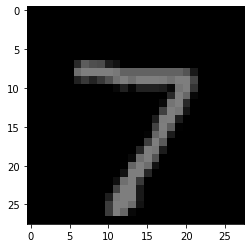

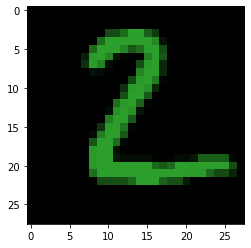

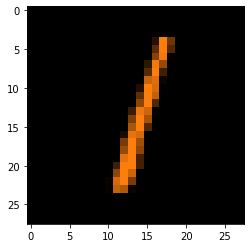

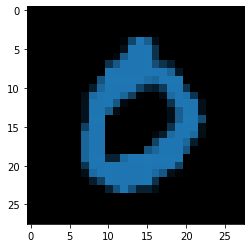

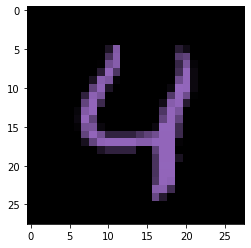

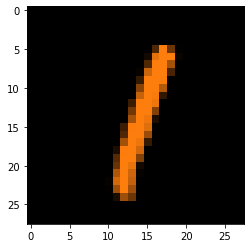

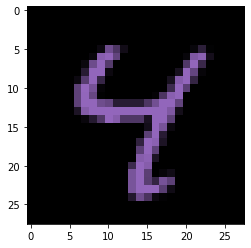

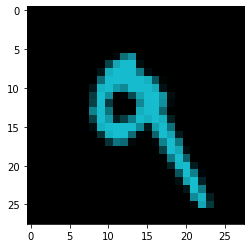

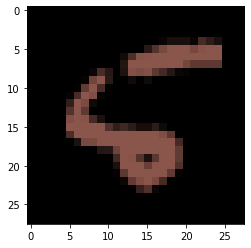

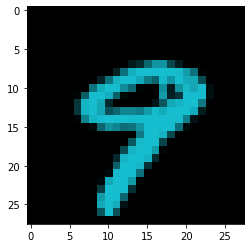

In [5]:
img_colored = np.fromfile('img-valid.bin', dtype=np.uint8).reshape(-1,3,28,28)
# img_colored = np.fromfile('img-valid.bin', dtype=np.uint8).reshape(-1,3,28,28)
for i in range(10):
    im = img_colored[i].transpose(1,2,0)/255
    plt.imshow(im)
    plt.show()
